In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [3]:
%matplotlib widget

In [4]:
folder = "../../Deidentified-Raw-Waveforms/"
coldict = {
    "raw_waves_data_1a.csv": ["time", "257"], "raw_waves_data_1b.csv": ["time", "257", "258"], "raw_waves_data_1c.csv": ["time", "257", "258"], "raw_waves_data_1d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_1e.csv": ["time", "258"],

    "raw_waves_data_2a.csv": ["time", "257", "258"], "raw_waves_data_2b.csv": ["time", "258"], "raw_waves_data_2c.csv": ["time", "257"], "raw_waves_data_2d.csv": ["time", "257", "258"], 
    "raw_waves_data_2e.csv": ["time", "257", "258"],

    "raw_waves_data_3a.csv": ["time", "258"], "raw_waves_data_3b.csv": ["time", "258"], "raw_waves_data_3c.csv": ["time", "258"], "raw_waves_data_3d.csv": ["time", "258"], 
    "raw_waves_data_3e.csv": ["time", "257", "258", "317"],

    "raw_waves_data_4a.csv": ["time", "257", "258"], "raw_waves_data_4b.csv": ["time", "257", "258"], "raw_waves_data_4c.csv": ["time", "257"], "raw_waves_data_4d.csv": ["time", "257", "258"], 
    "raw_waves_data_4e.csv": ["time", "257", "258"],

    "raw_waves_data_5a.csv": ["time", "258"], "raw_waves_data_5b.csv": ["time", "258"], "raw_waves_data_5c.csv": ["time", "258"], "raw_waves_data_5d.csv": ["time", "258", "317"],
    "raw_waves_data_5e.csv": ["time", "258"],

    "raw_waves_data_6a.csv": ["time", "257", "258"], "raw_waves_data_6b.csv": ["time", "258"], "raw_waves_data_6c.csv": ["time", "258"], "raw_waves_data_6d.csv": ["time", "258"], "raw_waves_data_6e.csv": ["time", "258"],
    
    "raw_waves_data_7a.csv": ["time", "257", "258"], "raw_waves_data_7b.csv": ["time", "258"], "raw_waves_data_7c.csv": ["time", "258"], "raw_waves_data_7d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_7e.csv": ["time", "258"]
}

namedict = {
    "raw_waves_data_1a.csv": "1a", "raw_waves_data_1b.csv": "1b", "raw_waves_data_1c.csv": "1c", "raw_waves_data_1d.csv": "1d", "raw_waves_data_1e.csv": "1e",
    "raw_waves_data_2a.csv": "2a", "raw_waves_data_2b.csv": "2b", "raw_waves_data_2c.csv": "2c", "raw_waves_data_2d.csv": "2d", "raw_waves_data_2e.csv": "2e",
    "raw_waves_data_3a.csv": "3a", "raw_waves_data_3b.csv": "3b", "raw_waves_data_3c.csv": "3c", "raw_waves_data_3d.csv": "3d", "raw_waves_data_3e.csv": "3e",
    "raw_waves_data_4a.csv": "4a", "raw_waves_data_4b.csv": "4b", "raw_waves_data_4c.csv": "4c", "raw_waves_data_4d.csv": "4d", "raw_waves_data_4e.csv": "4e",
    "raw_waves_data_5a.csv": "5a", "raw_waves_data_5b.csv": "5b", "raw_waves_data_5c.csv": "5c", "raw_waves_data_5d.csv": "5d", "raw_waves_data_5e.csv": "5e",
    "raw_waves_data_6a.csv": "6a", "raw_waves_data_6b.csv": "6b", "raw_waves_data_6c.csv": "6c", "raw_waves_data_6d.csv": "6d", "raw_waves_data_6e.csv": "6e",
    "raw_waves_data_7a.csv": "7a", "raw_waves_data_7b.csv": "7b", "raw_waves_data_7c.csv": "7c", "raw_waves_data_7d.csv": "7d", "raw_waves_data_7e.csv": "7e"    
}

In [5]:
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=7496613888, percent=40.8, used=5159157760, free=7496613888)

In [6]:
file = "raw_waves_data_1a.csv"

In [7]:
def complete_signal(df, cols):
    out = pd.Series(df[cols[1]]) # Column 0 is the time
    i=2
    while True:
        try:
            out = out.combine_first(df[cols[i]])
            i+=1
        except IndexError:
            break
    out = out.fillna(0)
    out = pd.to_numeric(out)
    print("Signals combined and filled in")

    return out


In [8]:
cols = coldict[file]
df = pd.read_csv(folder + file, usecols=cols)
times = df["time"]
signal = complete_signal(df, cols)
del df
collect_garbage()
virtual_memory()

Signals combined and filled in


svmem(total=12655771648, available=6200238080, percent=51.0, used=6455533568, free=6200238080)

In [9]:
# Here's a simple idea. Let's try na->fillforwarding anything that goes outside of the threshold, running the QRS detector, and then seeing if it performs well.
signal2 = signal.copy(deep=True)

In [10]:
#filt1 = (signal2 <= -10) | (signal2 >= 10)
#filt2 = filt1.copy(deep=True)
#delta = 5
#for i in range(len(filt1)):
#    if filt1.loc[i] == True:
#        for j in range(i-delta, i+delta):
#            try:
#                filt2.loc[j] = True
#            except IndexError:
#                continue


# Filter approach 2
delta = 125
filt = (signal2 <= -10) | (signal2 >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal2.loc[filt] = np.nan
signal2.fillna(method = "ffill", inplace=True) 

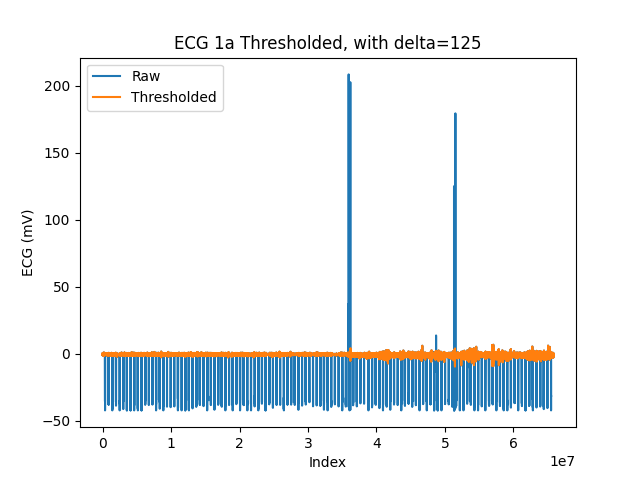

In [10]:
fig = plt.figure()
plt.plot(signal)
plt.plot(signal2)
plt.legend(["Raw", "Thresholded"], loc="upper left")
plt.xlabel("Index")
plt.ylabel("ECG (mV)")
plt.title("ECG 1a Thresholded, with delta=" + str(delta))
plt.show()

In [15]:
testsig = signal2.loc[365000:374000].copy(deep=True).reset_index()["257"]

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


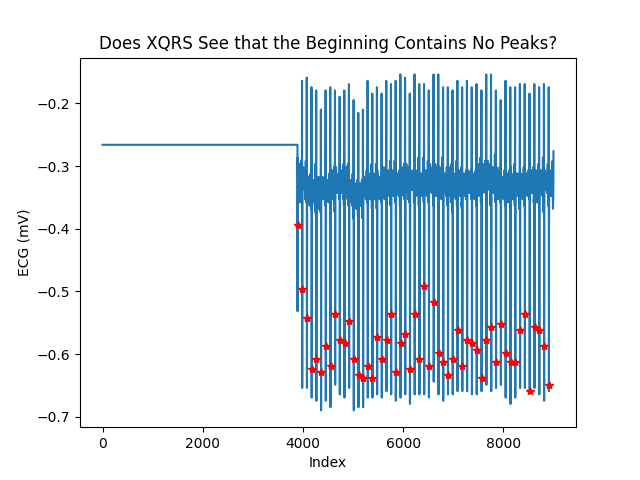

In [17]:
xqrs = processing.XQRS(sig=testsig, fs=250)
xqrs.detect()

fig = wfdb.plot_items(signal=testsig, ann_samp=[xqrs.qrs_inds], return_fig=True)
plt.title("Does XQRS See that the Beginning Contains No Peaks?")
plt.xlabel("Index")
plt.ylabel("ECG (mV)")
plt.show()

In [90]:
filt = (times >= 323000) & (times <= 359000)

sig1 = signal[filt].copy(deep=True)
sig2 = signal[filt].copy(deep=True)

del signal
del filt
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=2363891712, percent=81.3, used=10291879936, free=2363891712)

In [ ]:
fig = plt.figure()
plt.plot(sig1)
plt.plot(sig2)
plt.show()

In [91]:
sig2.loc[3551634:3564498] = -0.4

In [92]:
freq = 250

In [93]:
sig1 = sig1.reset_index()["257"]
sig2 = sig2.reset_index()["257"]

In [94]:
# Now, we're gonna try XQRS detection on this, let's start with sig1
xqrs = processing.XQRS(sig=sig1, fs=freq)
xqrs.detect(verbose=False)


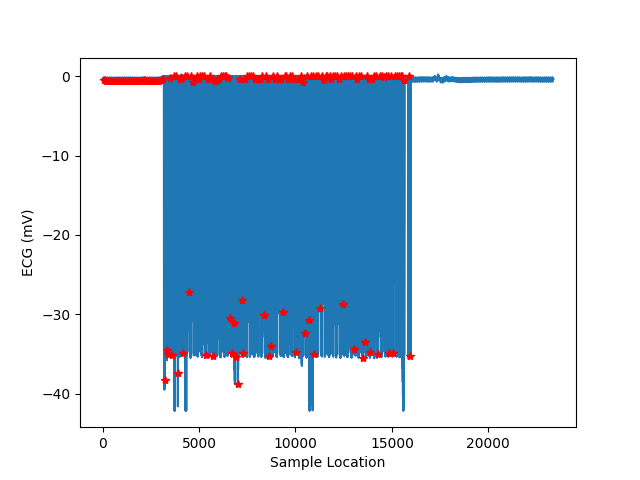

In [95]:
fig = wfdb.plot_items(signal=sig1, ann_samp=[xqrs.qrs_inds], return_fig=True)
plt.xlabel("Sample Location")
plt.ylabel("ECG (mV)")
plt.show()

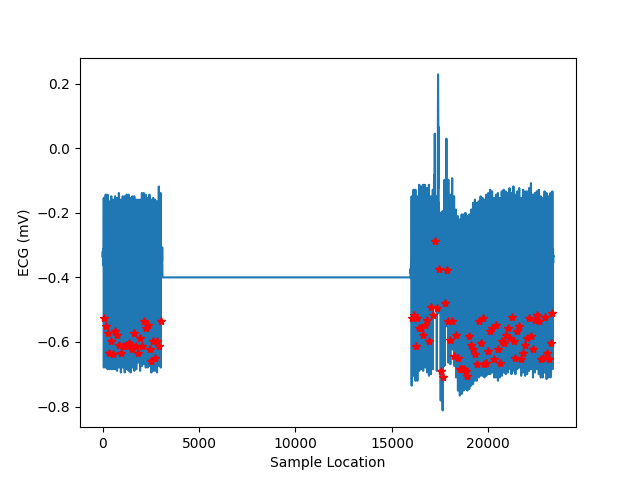

In [96]:
# And now we'll do it with sig2
# Now, we're gonna try XQRS detection on this, let's start with sig1
xqrs2 = processing.XQRS(sig=sig2, fs=freq)
xqrs2.detect(verbose=False)
fig = wfdb.plot_items(signal=sig2, ann_samp=[xqrs2.qrs_inds], return_fig=True)
plt.xlabel("Sample Location")
plt.ylabel("ECG (mV)")
plt.show()
